# Projekat 1 - nadgledano učenje

**Dataset:** http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

**Definicija problema:** Na osnovu parametara sa senzora za temperaturu, vlažnost vazduha, koncentraciju CO2 i osvetljenja odrediti da li je u prostoriji prisutna neka osoba.

**Vrsta problema:** binarna klasifikacija

## Podaci o datasetu

Izabrani dataset sadrži *time-series* podatke očitane sa senzora postavljenih u jednoj kancelariji. 

In [213]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.set(style="darkgrid")

data = pd.read_csv("occupancy_data/datatest2.txt", sep=',')
data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
6,2015-02-11 14:53:00,21.7600,31.260000,437.333333,1014.333333,0.005042,1
7,2015-02-11 14:54:00,21.7900,31.197500,434.000000,1018.500000,0.005041,1
8,2015-02-11 14:55:00,21.7900,31.393333,437.333333,1018.666667,0.005073,1
9,2015-02-11 14:55:59,21.7900,31.317500,434.000000,1022.000000,0.005060,1
10,2015-02-11 14:57:00,21.7900,31.463333,437.333333,1027.333333,0.005084,1


##### Broj uzoraka:

In [214]:
len(data)

9752

### Atributi dataseta

1. **_Date_** - Datum i vreme merenja.
2. **_Temperature_** - Temperatura u prostoriji izražena u stepenima Celzijusa. Kontinualne numeričke vrednosti.
3. **_Humidity_** - Vlažnost vazduha izražena u procentima. Kontinualne numeričke vrednosti.
4. **_Light_** - Osvetljenje u prostoriji izraženo u luksima. Kontinualni numerički podatak.
5. **_CO2_** - Koncentracija ugljen-dioksida u prostoriji izražena u ppm (*parts per million*). Kontinualni numerički podatak.
6. **_HumidityRatio_** - Odnos *kgwater-vapor/kg-air* (broj kilograma vodene pare po kilogramu vazduha). Kontinualni numerički podatak.
7. **_Occupancy_** - Binarni podatak koji govori da li u prostoriji ima nekog ili je prazna.

### Deskriptivna analiza dataseta

Sledeći isečak koda prikazuje distribuciju klasa u datasetu:

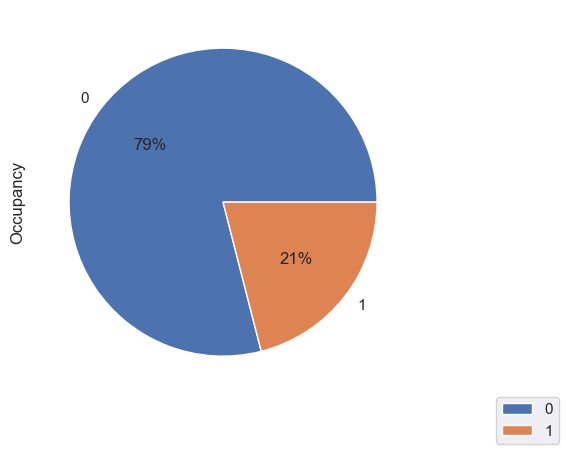

In [215]:
plt.figure(figsize=(7, 5))
pie = data.Occupancy.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.savefig("graphs/classdistribution.jpg")
plt.show()

Na dijagramu se može videti distribucija klasa u skupu podataka. Plavi deo dijagrama odgovara vrednosti 0 koja kodira stanje prazne prostorije, dok narandžasti deo odgovara vrednosti 1 koja kodira prisutnost osobe u prostoriji. Ovo su dve klase kojima jedan uzorak može da pripada, a cilj projekta biće razvijanje modela koji podatak klasifikuje u jednu od ove dve klase.

In [216]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


Vrednosti za Light i CO2 imaju najveći opseg, pa je korisno ispitati njihovu distribuciju.

##### *Skewness plot* za Light:

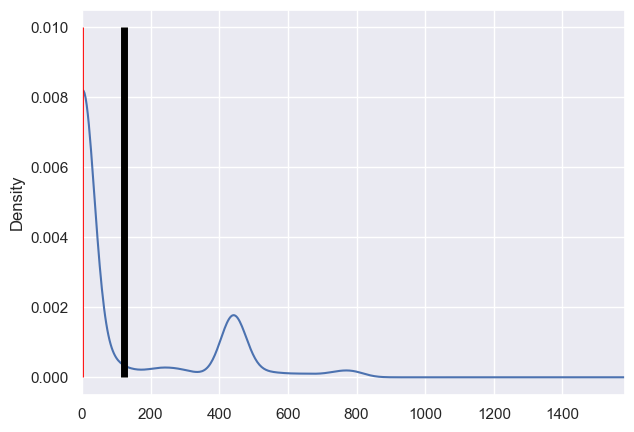

In [217]:
skewplot = data.Light.plot(kind="density",
              figsize=(7,5),
              xlim=(data.Light.min(),data.Light.max()));
plt.vlines(data.Light.mean(), 
           ymin=0, 
           ymax=0.01,
           linewidth=5.0,
           color="black");
plt.vlines(data.Light.median(),
           ymin=0, 
           ymax=0.01, 
           linewidth=2.0,
           color="red");

plt.savefig("graphs/skewplot-light.jpg")
plt.show()

##### *Boxplot* za Light:

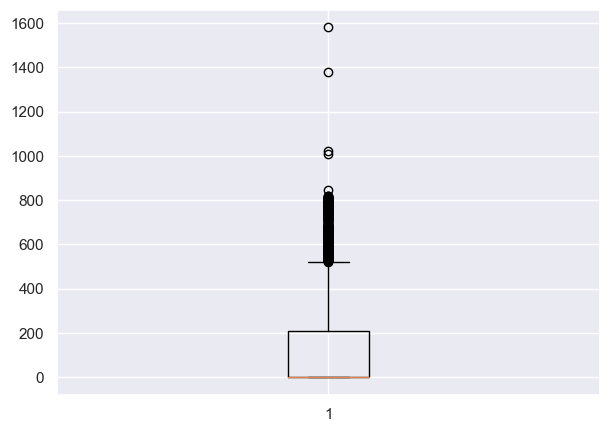

In [218]:
plt.figure(figsize=(7, 5))
boxplot = plt.boxplot(data.Light)
plt.savefig("graphs/boxplot-light.jpg")
plt.show()

##### *Skewness plot* za CO2:

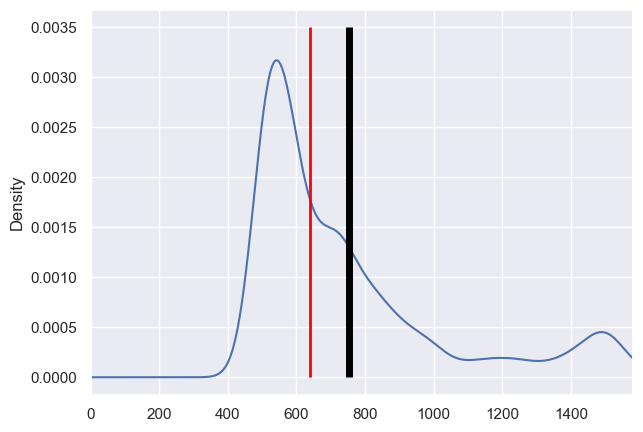

In [219]:
skewplot = data.CO2.plot(kind="density",
              figsize=(7,5),
              xlim=(data.Light.min(),data.Light.max()));
plt.vlines(data.CO2.mean(), 
           ymin=0, 
           ymax=0.0035,
           linewidth=5.0,
           color="black");
plt.vlines(data.CO2.median(),
           ymin=0, 
           ymax=0.0035, 
           linewidth=2.0,
           color="red");

plt.savefig("graphs/skewplot-CO2.jpg")
plt.show()

##### *Boxplot* za CO2:

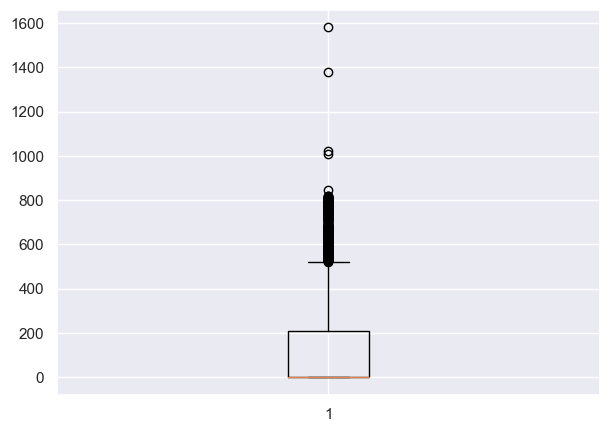

In [220]:
plt.figure(figsize=(7, 5))
boxplot = plt.boxplot(data.Light)
plt.savefig("graphs/boxplot-CO2.jpg")
plt.show()

Na osnovu ova 4 grafika može se primetiti da ovi atributi imaju značajan broj *outlier*-a.

## Preprocesiranje podataka

Na osnovu pregleda dataseta uočava se da su svi atributi osim _Date_ atributa numerički. Kako bi se podaci pripremili za primenu algoritma mašinskog učenja, potrebno je _Date_ podatke, koji su tipa _string_, pretopiti u numerički format.

U te svrhe najpre ćemo isprobati konverziju datuma i vremena u milisekunde:

In [221]:
data['date'] = [pd.to_datetime(date, format='%Y-%m-%d %H:%M:%S') for date in data['date']]
data['date'] = pd.DatetimeIndex(data.date).asi8
data['date'].head(2)

1    1423666080000000000
2    1423666140000000000
Name: date, dtype: int64

Može se uočiti iz sledećeg isečka koda da ne postoje podaci kojima nedostaju vrednosti

In [222]:
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Sledeći korak predstavlja izdvajanje kategoričke vrednosti od ostalih atributa skupa podataka:

In [223]:
cols = [col for col in data.columns if col not in ['Occupancy']]
data_features = data[cols]
target = data['Occupancy']
data_features.head(2)

,date,Temperature,Humidity,Light,CO2,HumidityRatio
1,1423666080000000000,21.76,31.133333,437.333333,1029.666667,0.005021
2,1423666140000000000,21.79,31.000000,437.333333,1000.000000,0.005009


Nakon odstranjivanja kategoričke vrednosti, koja zapravo predstavlja ciljni atribut, potrebno je podeliti skup podataka u train i test podatke. Test podaci predstavljaju ukupno 20% originalnog skupa podataka.

In [224]:
from sklearn.model_selection import train_test_split

data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

print(len(data_train))
print(len(data_test))



7801
1951


Podaci su pretrpeli minimalne izmene koje su potrebne za primenu bilo kog algoritma mašinskog učenja. Sledeća slika predstavlja najbolju praksu za primenu algoritama mašinskog učenja na osnovu zadatka koji se rešava (preuzeto sa _sklearn_ dokumentacije):

![ml-algorithms-best-practice.png](resource_images/ml-algorithms-best-practice.png)

Preporuka je da se za skupove podataka sa manje od 100 000 uzoraka krene od linearnog SVC, što je primenjeno u sledećem isečku koda:

In [225]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import io

svc_model = LinearSVC(random_state=0)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
report = classification_report(target_test,pred)
with io.open('evaluation/classification_report.txt','w',encoding='utf-8') as f: f.write(report)


LinearSVC accuracy :  0.7934392619169657


c:\Users\Nikola\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Nikola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

_Sklearn_ daje warning koji govori da model nije uspeo da konvergira ka rešenju. Ovakav problem nastaje usled loše balansiranih atributa - atributi _Light_ i _CO2_, kao i transformisani _Date_ atribut, su velike vrednosti. U slučaju Light i CO2 atributa, postoji i dosta _outlier_-a. Kako bi se ovaj problem otklonio, može se primeniti _scaler_ na podatke u cilju njihove normalizacije.

```
// napiši ovo bolje jer ti se sad spava @ future nevena (https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati)
```

In [226]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target_test, pred))

[[1548    0]
 [ 403    0]]


In [227]:
from sklearn import preprocessing
from sklearn.svm import SVC

scaler = preprocessing.MinMaxScaler()

svc_model = SVC(kernel="linear",random_state=0,probability=True)

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
report = classification_report(target_test,pred)
with io.open('evaluation/classification_report_scaler.txt','w',encoding='utf-8') as f: f.write(report)
print(confusion_matrix(target_test, pred))


LinearSVC accuracy :  0.9882111737570477
[[1528   20]
 [   3  400]]


In [228]:
dataTraining = pd.read_csv("occupancy_data/datatraining.txt", sep=',')
dataTraining['date'] = [pd.to_datetime(dataTraining, format='%Y-%m-%d %H:%M:%S') for dataTraining in dataTraining['date']]
dataTraining['date'] = pd.DatetimeIndex(dataTraining.date).asi8


cols = [col for col in dataTraining.columns if col not in ['Occupancy']]
dataTraining_features = dataTraining[cols]
targetTraining = dataTraining['Occupancy']



dataTest_features = data[cols]
targetTest= data['Occupancy']

print(len(dataTraining_features))
print(len(dataTest_features))

scaler = preprocessing.MinMaxScaler()

dataTraining_features = scaler.fit_transform(dataTraining_features)
dataTest_features = scaler.transform(dataTest_features)

pred = svc_model.fit(dataTraining_features, targetTraining).predict(dataTest_features)

print("LinearSVC accuracy : ",accuracy_score(targetTest, pred, normalize = True))
report = classification_report(targetTest,pred)
with io.open('evaluation/classification_report_scaler_new.txt','w',encoding='utf-8') as f: f.write(report)
print(confusion_matrix(targetTest, pred))


8143
9752
LinearSVC accuracy :  0.8435192780968006
[[7690   13]
 [1513  536]]


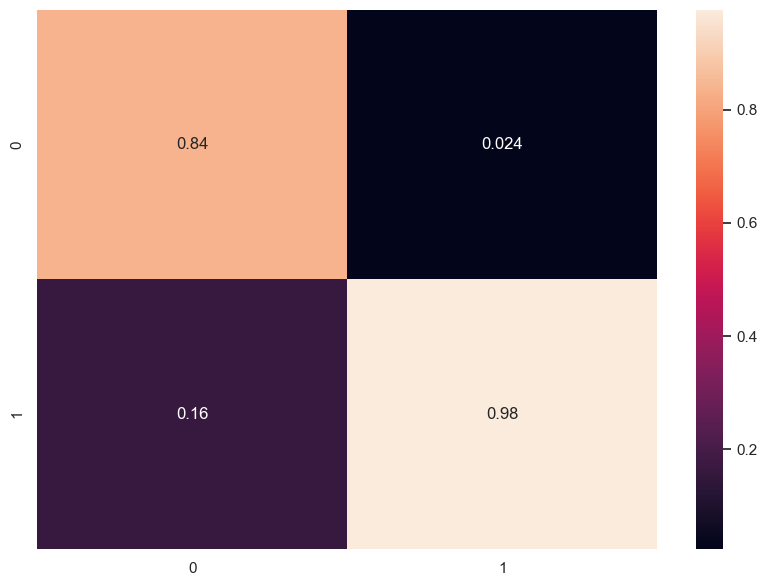

In [229]:
result = confusion_matrix(targetTest, pred, normalize='pred')

classes = ["0", "1"]
df_cfm = pd.DataFrame(result, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sns.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("evaluation\cfm.png")

In [230]:
dataTest = pd.read_csv("occupancy_data/datatest.txt", sep=',')
dataTest['date'] = [pd.to_datetime(dataTest, format='%Y-%m-%d %H:%M:%S') for dataTest in dataTest['date']]
dataTest['date'] = pd.DatetimeIndex(dataTest.date).asi8

dataConcatinated = pd.concat([data,dataTest,dataTraining],axis=0)
print(len(dataConcatinated))

cols = [col for col in dataConcatinated.columns if col not in ['Occupancy']]
dataConcatinated_features = dataConcatinated[cols]
targetConcatinated = dataConcatinated['Occupancy']

data_train,data_test,target_train,target_test = train_test_split(dataConcatinated_features,targetConcatinated,test_size=0.2,random_state=10)

print(len(data_train))
print(len(data_test))


scaler = preprocessing.MinMaxScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
report = classification_report(target_test,pred)
with io.open('evaluation/classification_report_scaler_concatinated.txt','w',encoding='utf-8') as f: f.write(report)
print(confusion_matrix(target_test, pred))


20560
16448
4112
LinearSVC accuracy :  0.9883268482490273
[[3077   45]
 [   3  987]]


In [231]:
dataConcatinated['date'] = pd.to_datetime(dataConcatinated['date'],unit='ns')
dataConcatinated['dayOfWeek'] = dataConcatinated['date'].dt.day_of_week
dataConcatinated['secondsSinceMidnight'] = dataConcatinated['date'].apply(lambda x: (x.hour*3600+x.minute*60+x.second))
p = dataConcatinated.describe()
print(p)
dataConcatinated.head(2)


        Temperature      Humidity         Light           CO2  HumidityRatio  \
count  20560.000000  20560.000000  20560.000000  20560.000000   20560.000000   
mean      20.906212     27.655925    130.756622    690.553276       0.004228   
std        1.055315      4.982154    210.430875    311.201281       0.000768   
min       19.000000     16.745000      0.000000    412.750000       0.002674   
25%       20.200000     24.500000      0.000000    460.000000       0.003719   
50%       20.700000     27.290000      0.000000    565.416667       0.004292   
75%       21.525000     31.290000    301.000000    804.666667       0.004832   
max       24.408333     39.500000   1697.250000   2076.500000       0.006476   

          Occupancy     dayOfWeek  secondsSinceMidnight  
count  20560.000000  20560.000000          20560.000000  
mean       0.231031      2.896109          42997.431031  
std        0.421503      2.059338          25497.938212  
min        0.000000      0.000000              

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,dayOfWeek,secondsSinceMidnight
1,2015-02-11 14:48:00,21.76,31.133333,437.333333,1029.666667,0.005021,1,2,53280
2,2015-02-11 14:49:00,21.79,31.000000,437.333333,1000.000000,0.005009,1,2,53340


In [232]:
cols = [col for col in dataConcatinated.columns if col not in ['Occupancy','date']]
data_features = dataConcatinated[cols]
target = dataConcatinated['Occupancy']
data_features.head(2)

,Temperature,Humidity,Light,CO2,HumidityRatio,dayOfWeek,secondsSinceMidnight
1,21.76,31.133333,437.333333,1029.666667,0.005021,2,53280
2,21.79,31.000000,437.333333,1000.000000,0.005009,2,53340


In [233]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

print(len(data_train))
print(len(data_test))

scaler = preprocessing.MinMaxScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))



16448
4112
LinearSVC accuracy :  0.9892996108949417
[[3081   41]
 [   3  987]]


In [234]:
scaler = preprocessing.RobustScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
report = classification_report(target_test,pred)
with io.open('evaluation/classification_report_LinearSVC_concat.txt','w',encoding='utf-8') as f: f.write(report)
print(confusion_matrix(target_test, pred))

LinearSVC accuracy :  0.9897859922178989
[[3083   39]
 [   3  987]]


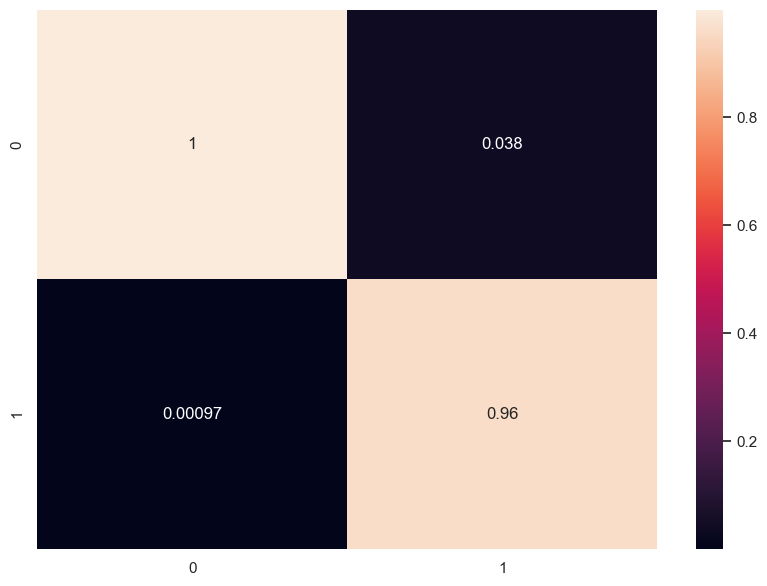

In [235]:
result = confusion_matrix(target_test, pred, normalize='pred')

classes = ["0", "1"]
df_cfm = pd.DataFrame(result, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sns.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("evaluation\cfm2.png")

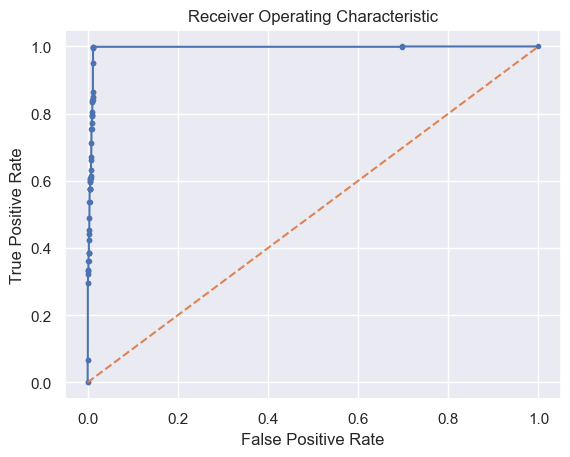

ROC AUC=0.994


In [236]:
from sklearn.metrics import roc_curve,roc_auc_score

target_probabilities = svc_model.predict_proba(data_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,target_probabilities)

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate,marker='.')
plt.plot([0, 1], ls="--")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

lr_auc = roc_auc_score(target_test, target_probabilities)
print('ROC AUC=%.3f' % (lr_auc))


In [237]:
print(svc_model.n_support_)
print(len([x for x in target_train if x == 0]))
print(len([x for x in target_train if x == 1]))

[260 262]
12688
3760


In [238]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0)

predDT = decisionTree.fit(data_train, target_train).predict(data_test)

print("DecisionTree accuracy : ",accuracy_score(target_test, predDT, normalize = True))
print(confusion_matrix(target_test, predDT))
report = classification_report(target_test,predDT)
with io.open('evaluation/classification_report_DecisionTree_1.txt','w',encoding='utf-8') as f: f.write(report)

DecisionTree accuracy :  0.9931906614785992
[[3105   17]
 [  11  979]]


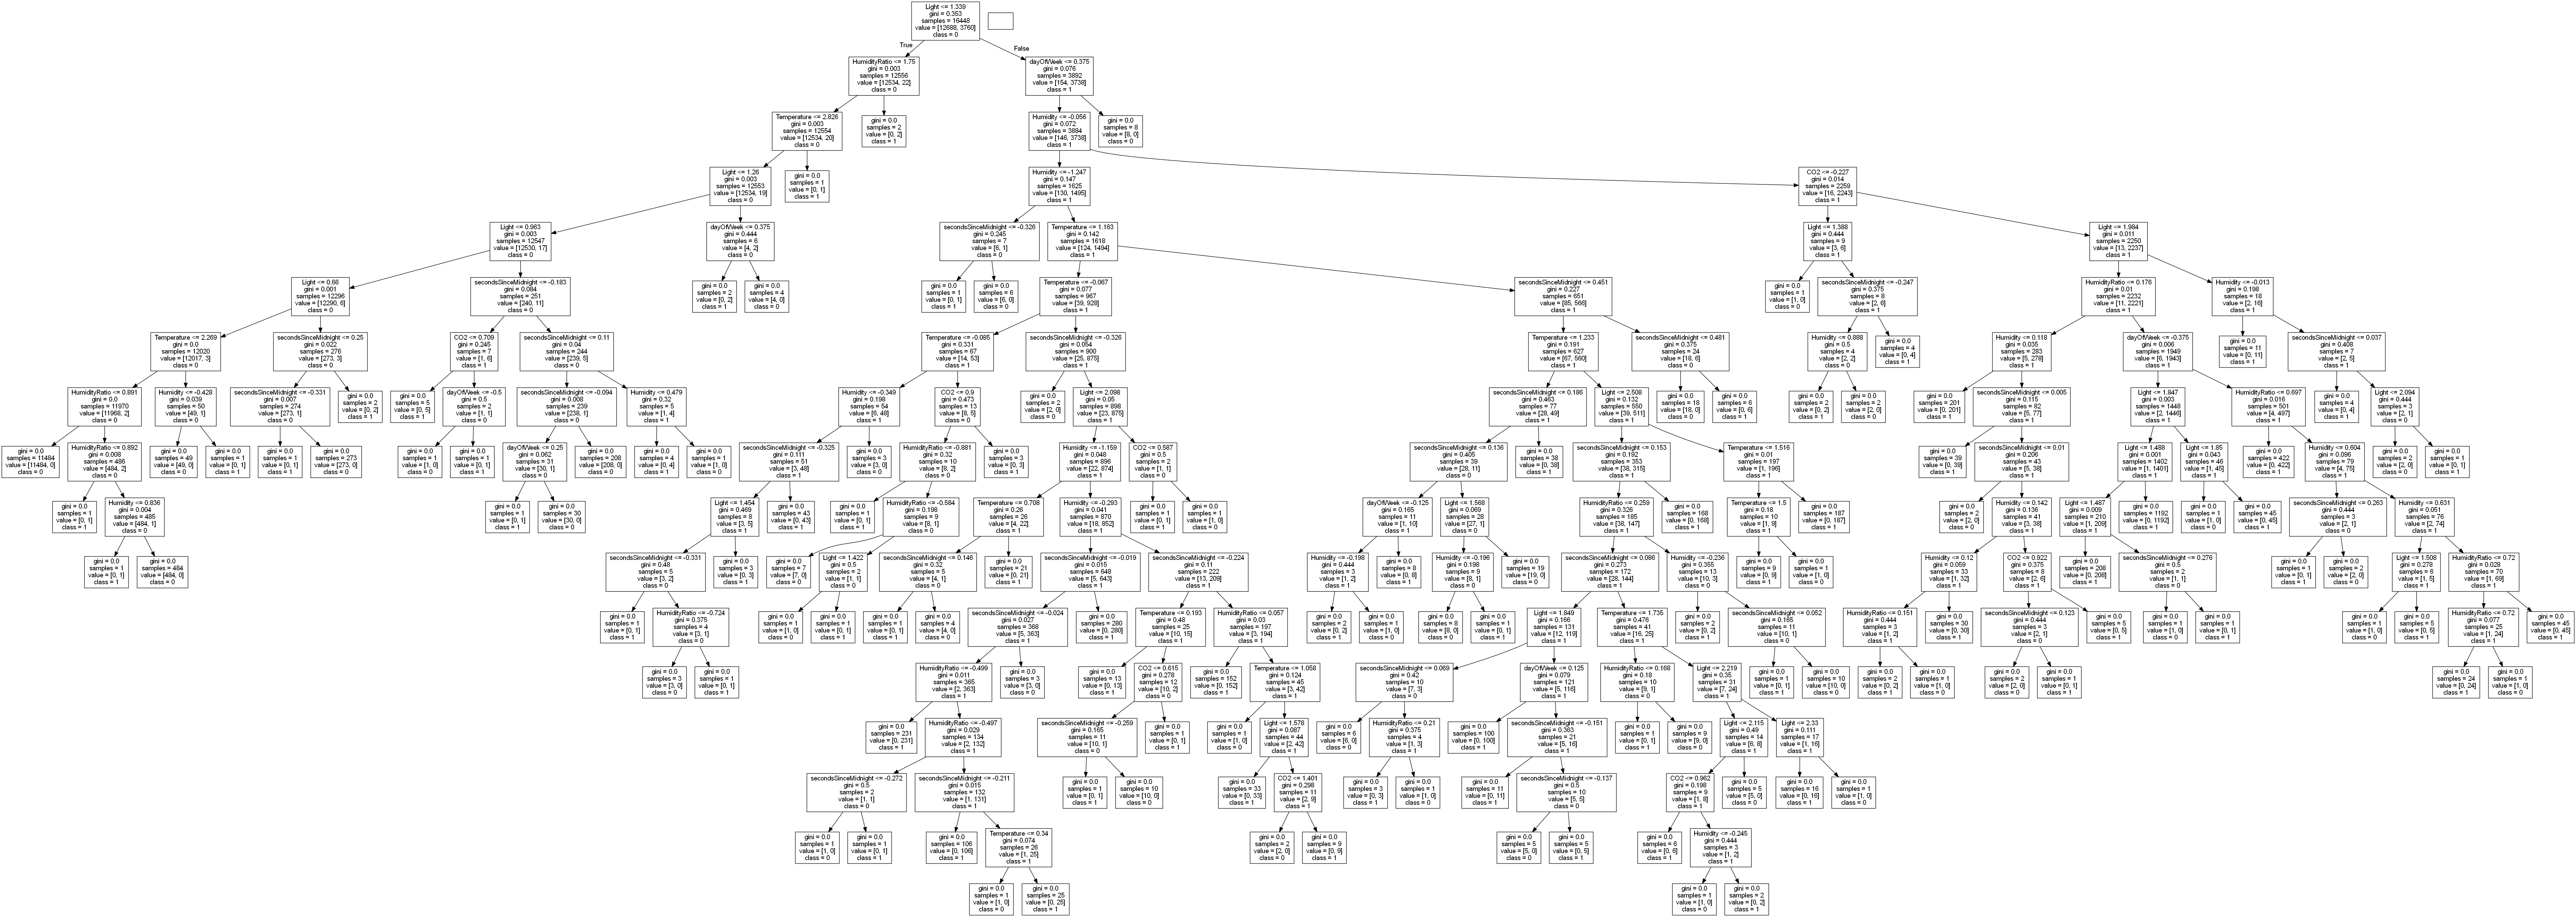

In [239]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(decisionTree,
 out_file=None,
feature_names=data_features.columns,
 class_names=['0','1'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

In [250]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=0,criterion="entropy")

randomForestModel = randomForest.fit(data_train, target_train)

predRFC = randomForestModel.predict(data_test)

print("RandomTree accuracy : ",accuracy_score(target_test, predRFC, normalize = True))
print(confusion_matrix(target_test, predRFC))
report = classification_report(target_test,predRFC)
with io.open('evaluation/classification_report_RandomForest_1.txt','w',encoding='utf-8') as f: f.write(report)

RandomTree accuracy :  0.9941634241245136
[[3106   16]
 [   8  982]]


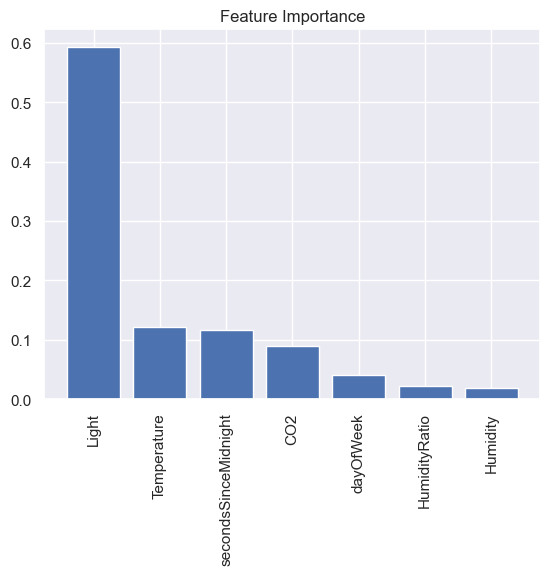

In [241]:
importances = randomForestModel.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data_features.columns[i] for i in indices]

plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(data_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(data_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

In [243]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(randomForest,threshold=0.05) 

features_important = selector.fit_transform(data_train, target_train)

test_important = selector.transform(data_test)

randomForestModel = randomForest.fit(features_important,target_train)

predRFC = randomForestModel.predict(test_important)

print("RandomTree accuracy : ",accuracy_score(target_test, predRFC, normalize = True))
print(confusion_matrix(target_test, predRFC))
report = classification_report(target_test,predRFC)
with io.open('evaluation/classification_report_RandomForest_2.txt','w',encoding='utf-8') as f: f.write(report)

RandomTree accuracy :  0.9944066147859922
[[3108   14]
 [   9  981]]


In [249]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=3)

nnModel = nearest_neighbors.fit(data_train,target_train)

predNN = nnModel.predict(data_test)

print("RandomTree accuracy : ",accuracy_score(target_test, predNN, normalize = True))
print(confusion_matrix(target_test, predNN))
report = classification_report(target_test,predNN)
with io.open('evaluation/classification_report_KNeighbors_1.txt','w',encoding='utf-8') as f: f.write(report)

RandomTree accuracy :  0.9936770428015564
[[3107   15]
 [  11  979]]


c:\Users\Nikola\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
#### TODO GridSearchCV